## Importing required libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing

# Converting Dataset to DataFrame

In [34]:
df = pd.read_fwf("17.txt", header = None)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2018,133,20,23,23,790,23,-0.0469,-0.0385,0.00582,...,51.0,SYNC,ON,ON,ON,SYNC,NOT_USBL,ENA,LOW,ON
1,2018,133,20,23,25,326,26,-0.0469,-0.0385,0.00582,...,51.0,SYNC,ON,ON,ON,SYNC,NOT_USBL,ENA,LOW,ON
2,2018,133,20,23,26,862,29,-0.0469,-0.0385,0.00582,...,51.0,SYNC,ON,ON,ON,SYNC,NOT_USBL,ENA,LOW,ON
3,2018,133,20,27,36,207,4,-0.0469,-0.0385,0.00582,...,51.0,SYNC,ON,ON,ON,SYNC,NOT_USBL,ENA,LOW,ON
4,2018,133,20,27,41,327,14,-0.0469,-0.0385,0.00582,...,51.0,SYNC,ON,ON,ON,SYNC,NOT_USBL,ENA,LOW,ON
5,2018,133,20,27,42,863,17,-0.0469,-0.0385,0.00582,...,51.0,SYNC,ON,ON,ON,SYNC,NOT_USBL,ENA,LOW,ON
6,2018,133,20,27,44,399,20,-0.0469,-0.0385,0.00582,...,51.0,SYNC,ON,ON,ON,SYNC,NOT_USBL,ENA,LOW,ON
7,2018,133,20,27,45,423,22,-0.0469,-0.0385,0.00582,...,51.0,SYNC,ON,ON,ON,SYNC,NOT_USBL,ENA,LOW,ON
8,2018,133,20,27,45,935,23,-0.0469,-0.0385,0.00582,...,51.0,SYNC,ON,ON,ON,SYNC,NOT_USBL,ENA,LOW,ON
9,2018,133,20,27,47,471,26,-0.0469,-0.0385,0.00582,...,51.0,SYNC,ON,ON,ON,SYNC,NOT_USBL,ENA,LOW,ON


## Adding column header 

In [35]:
df.columns = ['c' + str(n) for n in range(1,29)]
df.tail()

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,...,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28
9995,2018,135,15,38,23,385,26,-0.0469,-0.0385,0.00536,...,51.0,SYNC,ON,ON,ON,SYNC,NOT_USBL,ENA,LOW,ON
9996,2018,135,15,38,24,921,29,-0.0469,-0.0385,0.00536,...,51.0,SYNC,ON,ON,ON,SYNC,NOT_USBL,ENA,LOW,ON
9997,2018,135,15,42,34,266,4,-0.0469,-0.0385,0.00536,...,51.0,SYNC,ON,ON,ON,SYNC,NOT_USBL,ENA,LOW,ON
9998,2018,135,15,42,39,386,14,-0.0469,-0.0385,0.00536,...,51.0,SYNC,ON,ON,ON,SYNC,NOT_USBL,ENA,LOW,ON
9999,2018,135,15,42,40,922,17,-0.0469,-0.0385,0.00536,...,51.0,SYNC,ON,ON,ON,SYNC,NOT_USBL,ENA,LOW,ON


In [36]:
df.drop(['c1'] + ['c' + str(n) for n in range(20,29)], axis=1, inplace = True)
df.head()

,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19
0,133,20,23,23,790,23,-0.0469,-0.0385,0.00582,0.01086,-0.0981,-0.0687,0.00661,0.00809,37.0,52.0,38.0,51.0
1,133,20,23,25,326,26,-0.0469,-0.0385,0.00582,0.01086,-0.0981,-0.0687,0.00661,0.00809,37.0,52.0,38.0,51.0
2,133,20,23,26,862,29,-0.0469,-0.0385,0.00582,0.01086,-0.0981,-0.0687,0.00661,0.00809,37.0,52.0,38.0,51.0
3,133,20,27,36,207,4,-0.0469,-0.0385,0.00582,0.01086,-0.0981,-0.0687,0.00661,0.00809,37.0,52.0,38.0,51.0
4,133,20,27,41,327,14,-0.0469,-0.0385,0.00582,0.01086,-0.0981,-0.0687,0.00661,0.00809,37.0,52.0,38.0,51.0


## Description of the dataframe

In [37]:
df.describe()

,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,134.359800,10.623000,29.998500,29.510700,500.380800,19.378900,-0.050734,-0.036851,0.005655,0.011118,-0.066728,-0.073841,0.006606,0.007911,36.987800,51.350800,37.037900,50.932700
std,0.586838,6.484896,17.811373,17.310542,288.855575,7.313979,0.040127,0.042639,0.000308,0.000316,0.098564,0.040780,0.000496,0.000307,0.147151,0.477244,0.190964,0.266041
min,133.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-0.503300,-0.509700,0.001950,0.007380,-0.553100,-0.511900,0.003040,0.004170,36.000000,51.000000,37.000000,50.000000
25%,134.000000,5.000000,14.000000,15.000000,249.000000,16.250000,-0.046900,-0.038500,0.005520,0.010910,-0.098100,-0.068700,0.006460,0.007790,37.000000,51.000000,37.000000,51.000000
50%,134.000000,11.000000,28.000000,29.500000,500.000000,22.000000,-0.046900,-0.038500,0.005720,0.011085,-0.098100,-0.068700,0.006560,0.007990,37.000000,51.000000,37.000000,51.000000
75%,135.000000,15.000000,47.000000,44.250000,753.000000,26.000000,-0.046900,-0.038500,0.005820,0.011310,-0.098100,-0.068700,0.006660,0.008090,37.000000,52.000000,37.000000,51.000000
max,135.000000,23.000000,59.000000,59.000000,999.000000,29.000000,0.409500,0.432700,0.009800,0.015300,0.584400,0.374500,0.010420,0.012010,38.000000,52.000000,38.000000,52.000000


## Finding Median

In [38]:
df.median(axis=0)

c2     134.000000
c3      11.000000
c4      28.000000
c5      29.500000
c6     500.000000
c7      22.000000
c8      -0.046900
c9      -0.038500
c10      0.005720
c11      0.011085
c12     -0.098100
c13     -0.068700
c14      0.006560
c15      0.007990
c16     37.000000
c17     51.000000
c18     37.000000
c19     51.000000
dtype: float64

In [29]:
plt.rcParams['figure.figsize'] = [50, 50]

## MinMaxScaler

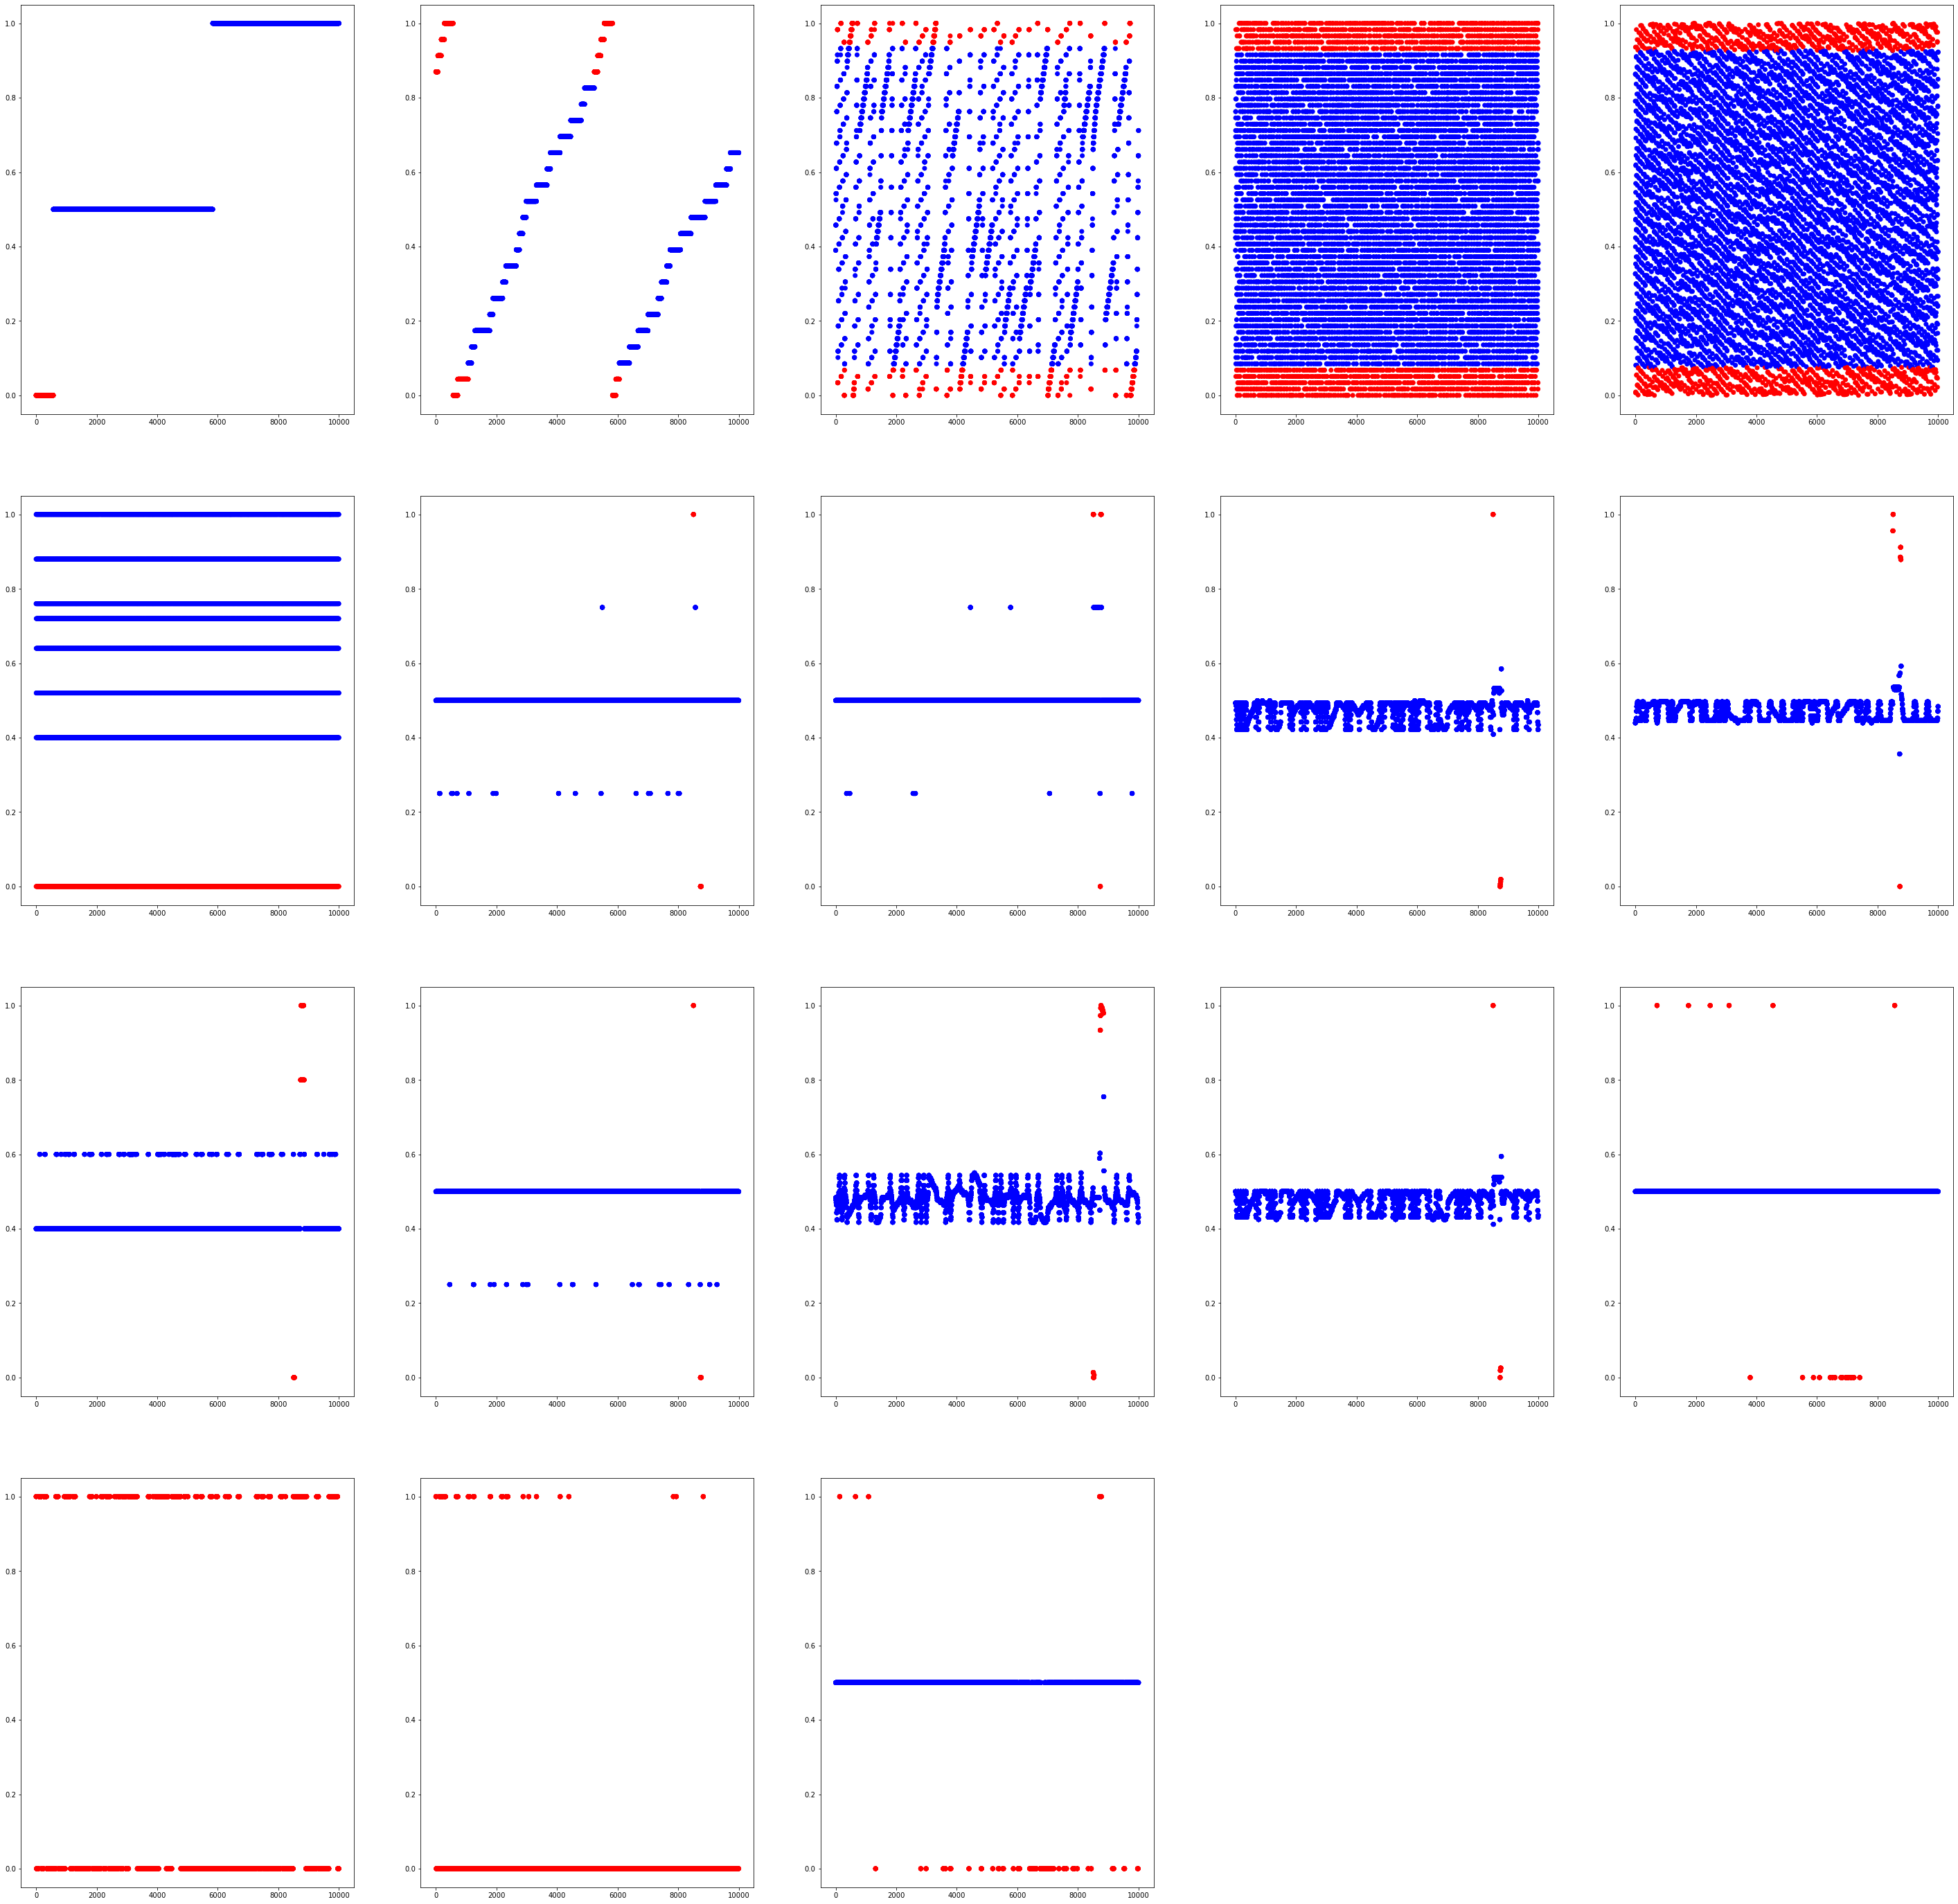

In [39]:
min_max_scaler = preprocessing.MinMaxScaler()
newDf = min_max_scaler.fit_transform(df)

newDf = pd.DataFrame(newDf)

for i in range(18):
  m = np.mean(newDf[i])
  cols = np.where((newDf[i] >= m - (0.85 * m)) & (newDf[i] <= m + (0.85 * m)), 'b', 'r')
  plt.subplot(4,5,i + 1)
  plt.scatter(newDf.index,newDf[i], c = cols)
plt.show()

## Z-Score

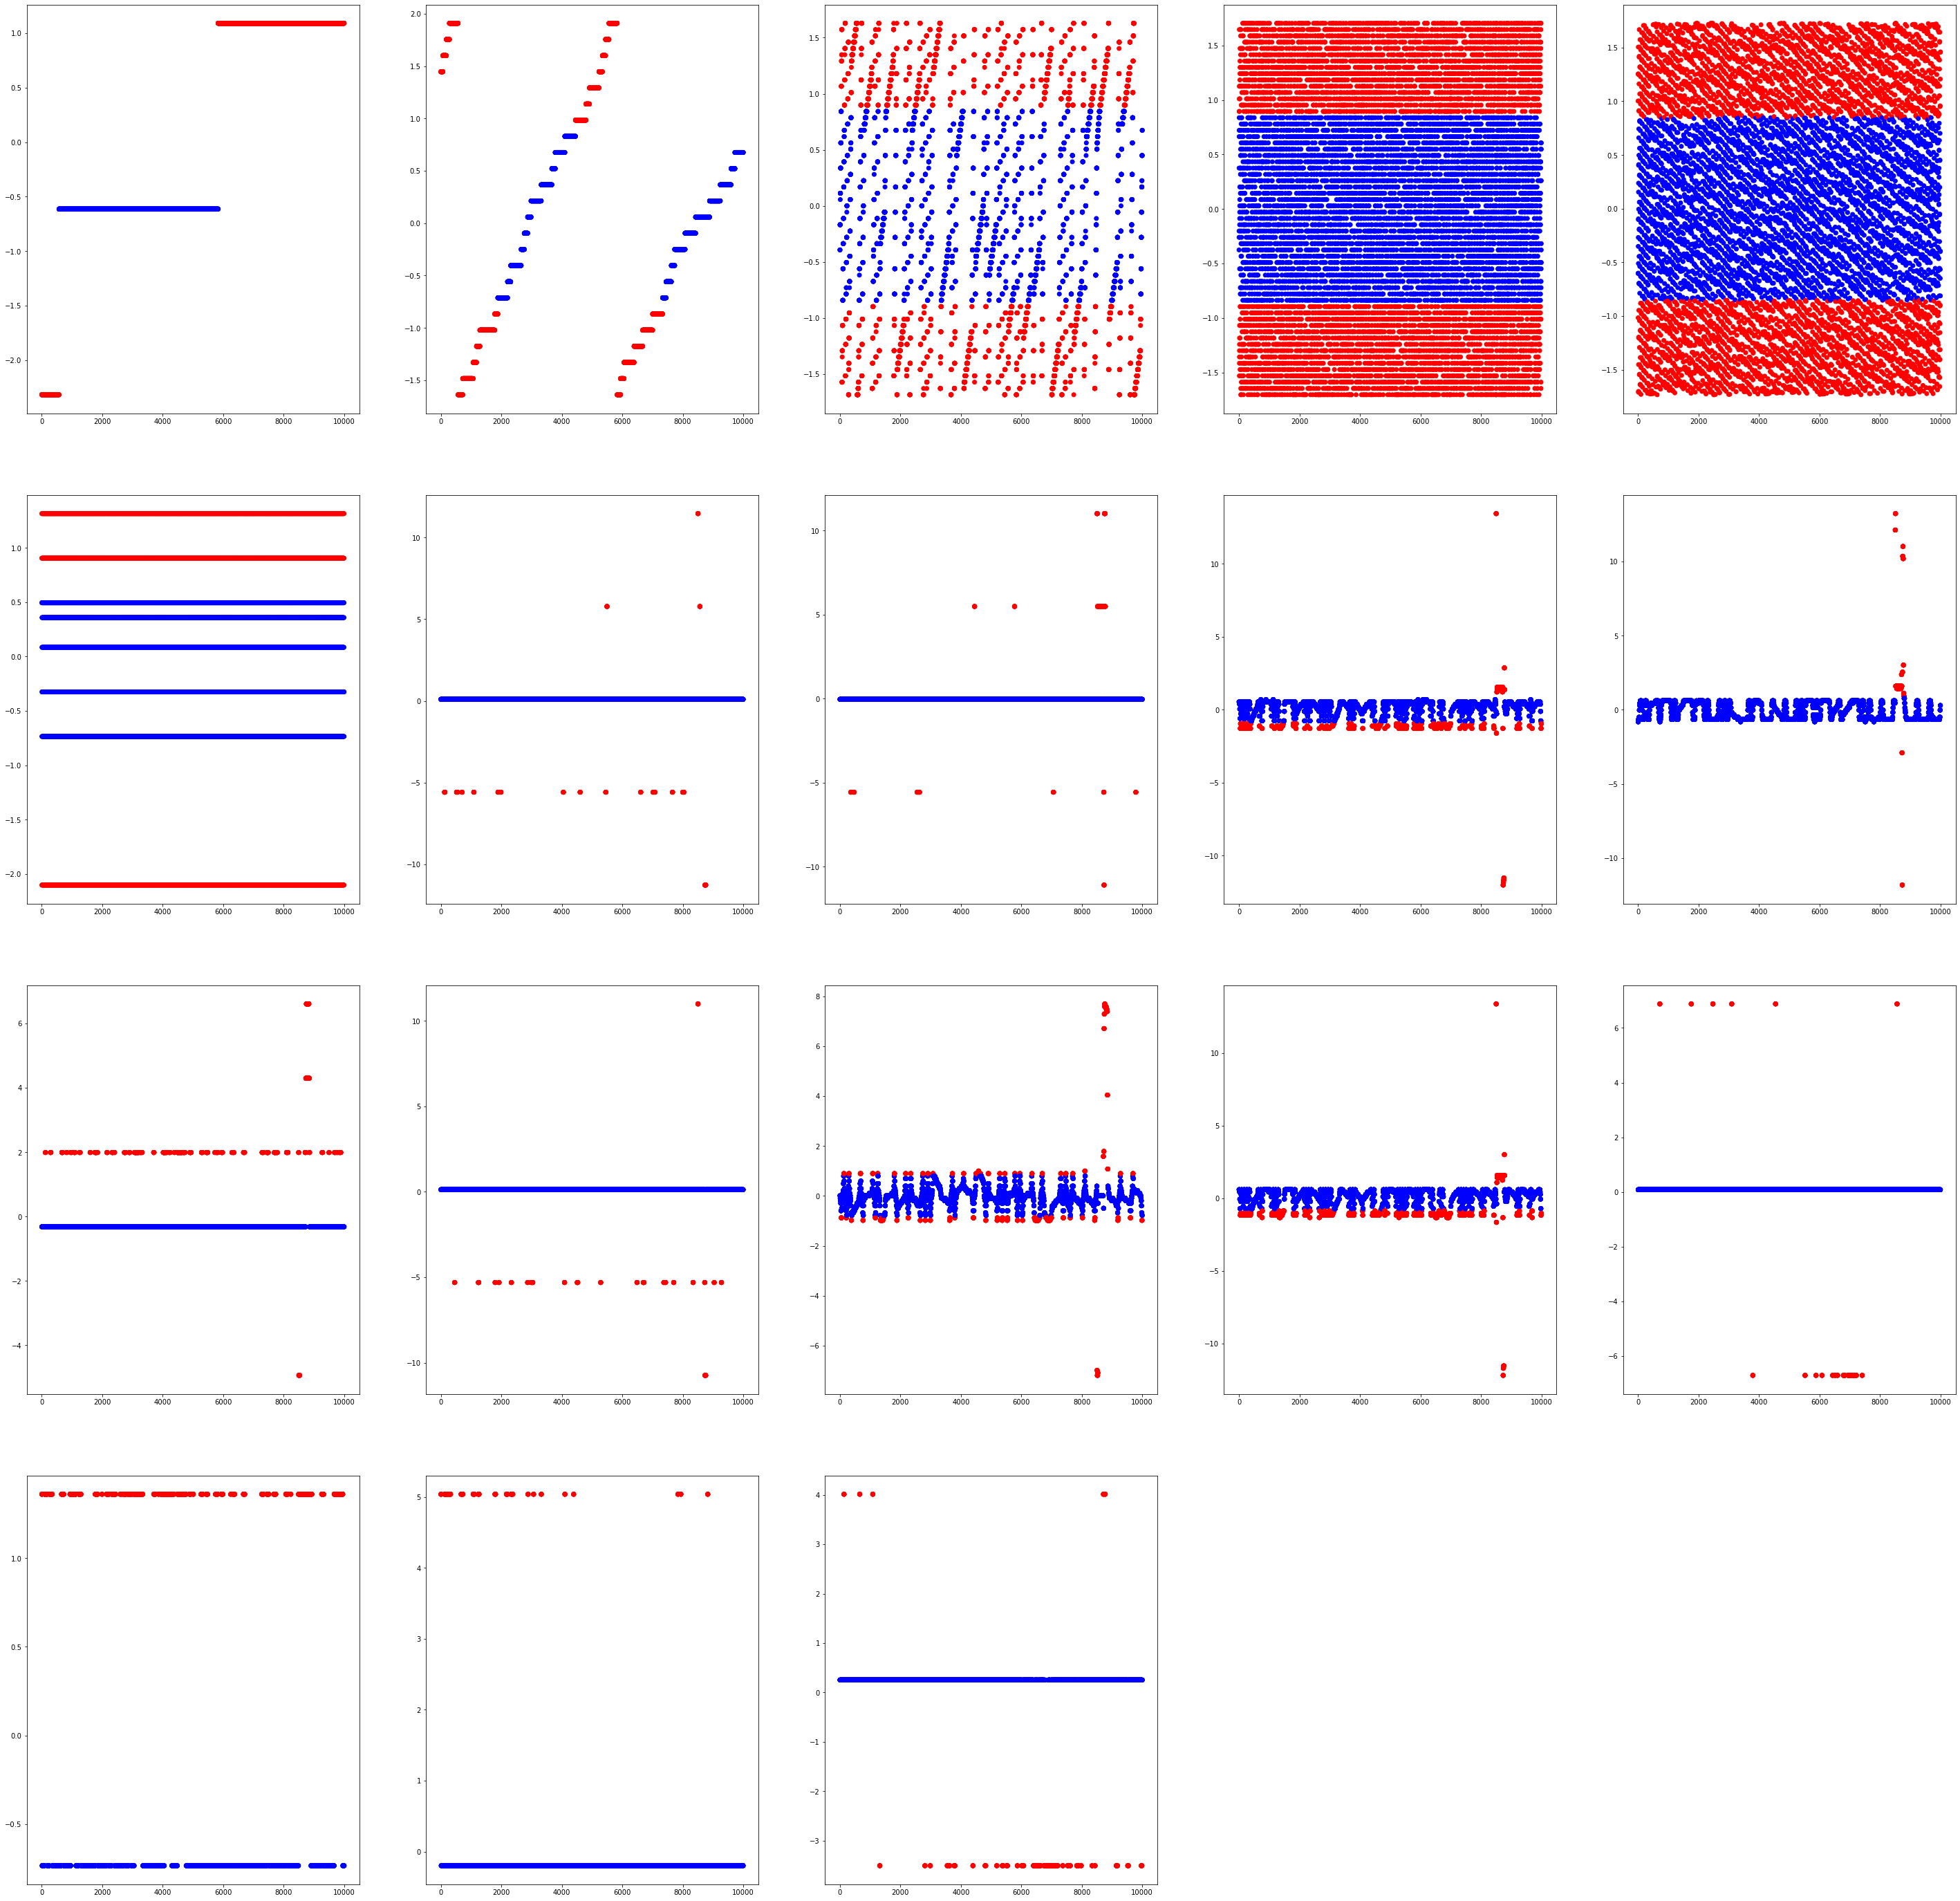

In [40]:
z_scaler = preprocessing.StandardScaler()
newDf = z_scaler.fit_transform(df)

newDf = pd.DataFrame(newDf)

for i in range(18):
  m = np.mean(newDf[i])
  cols = np.where((newDf[i] >= -0.85) & (newDf[i] <= 0.85), 'b', 'r')
  plt.subplot(4,5,i + 1)
  plt.scatter(newDf.index,newDf[i], c = cols)
plt.show()

## Max Absolute

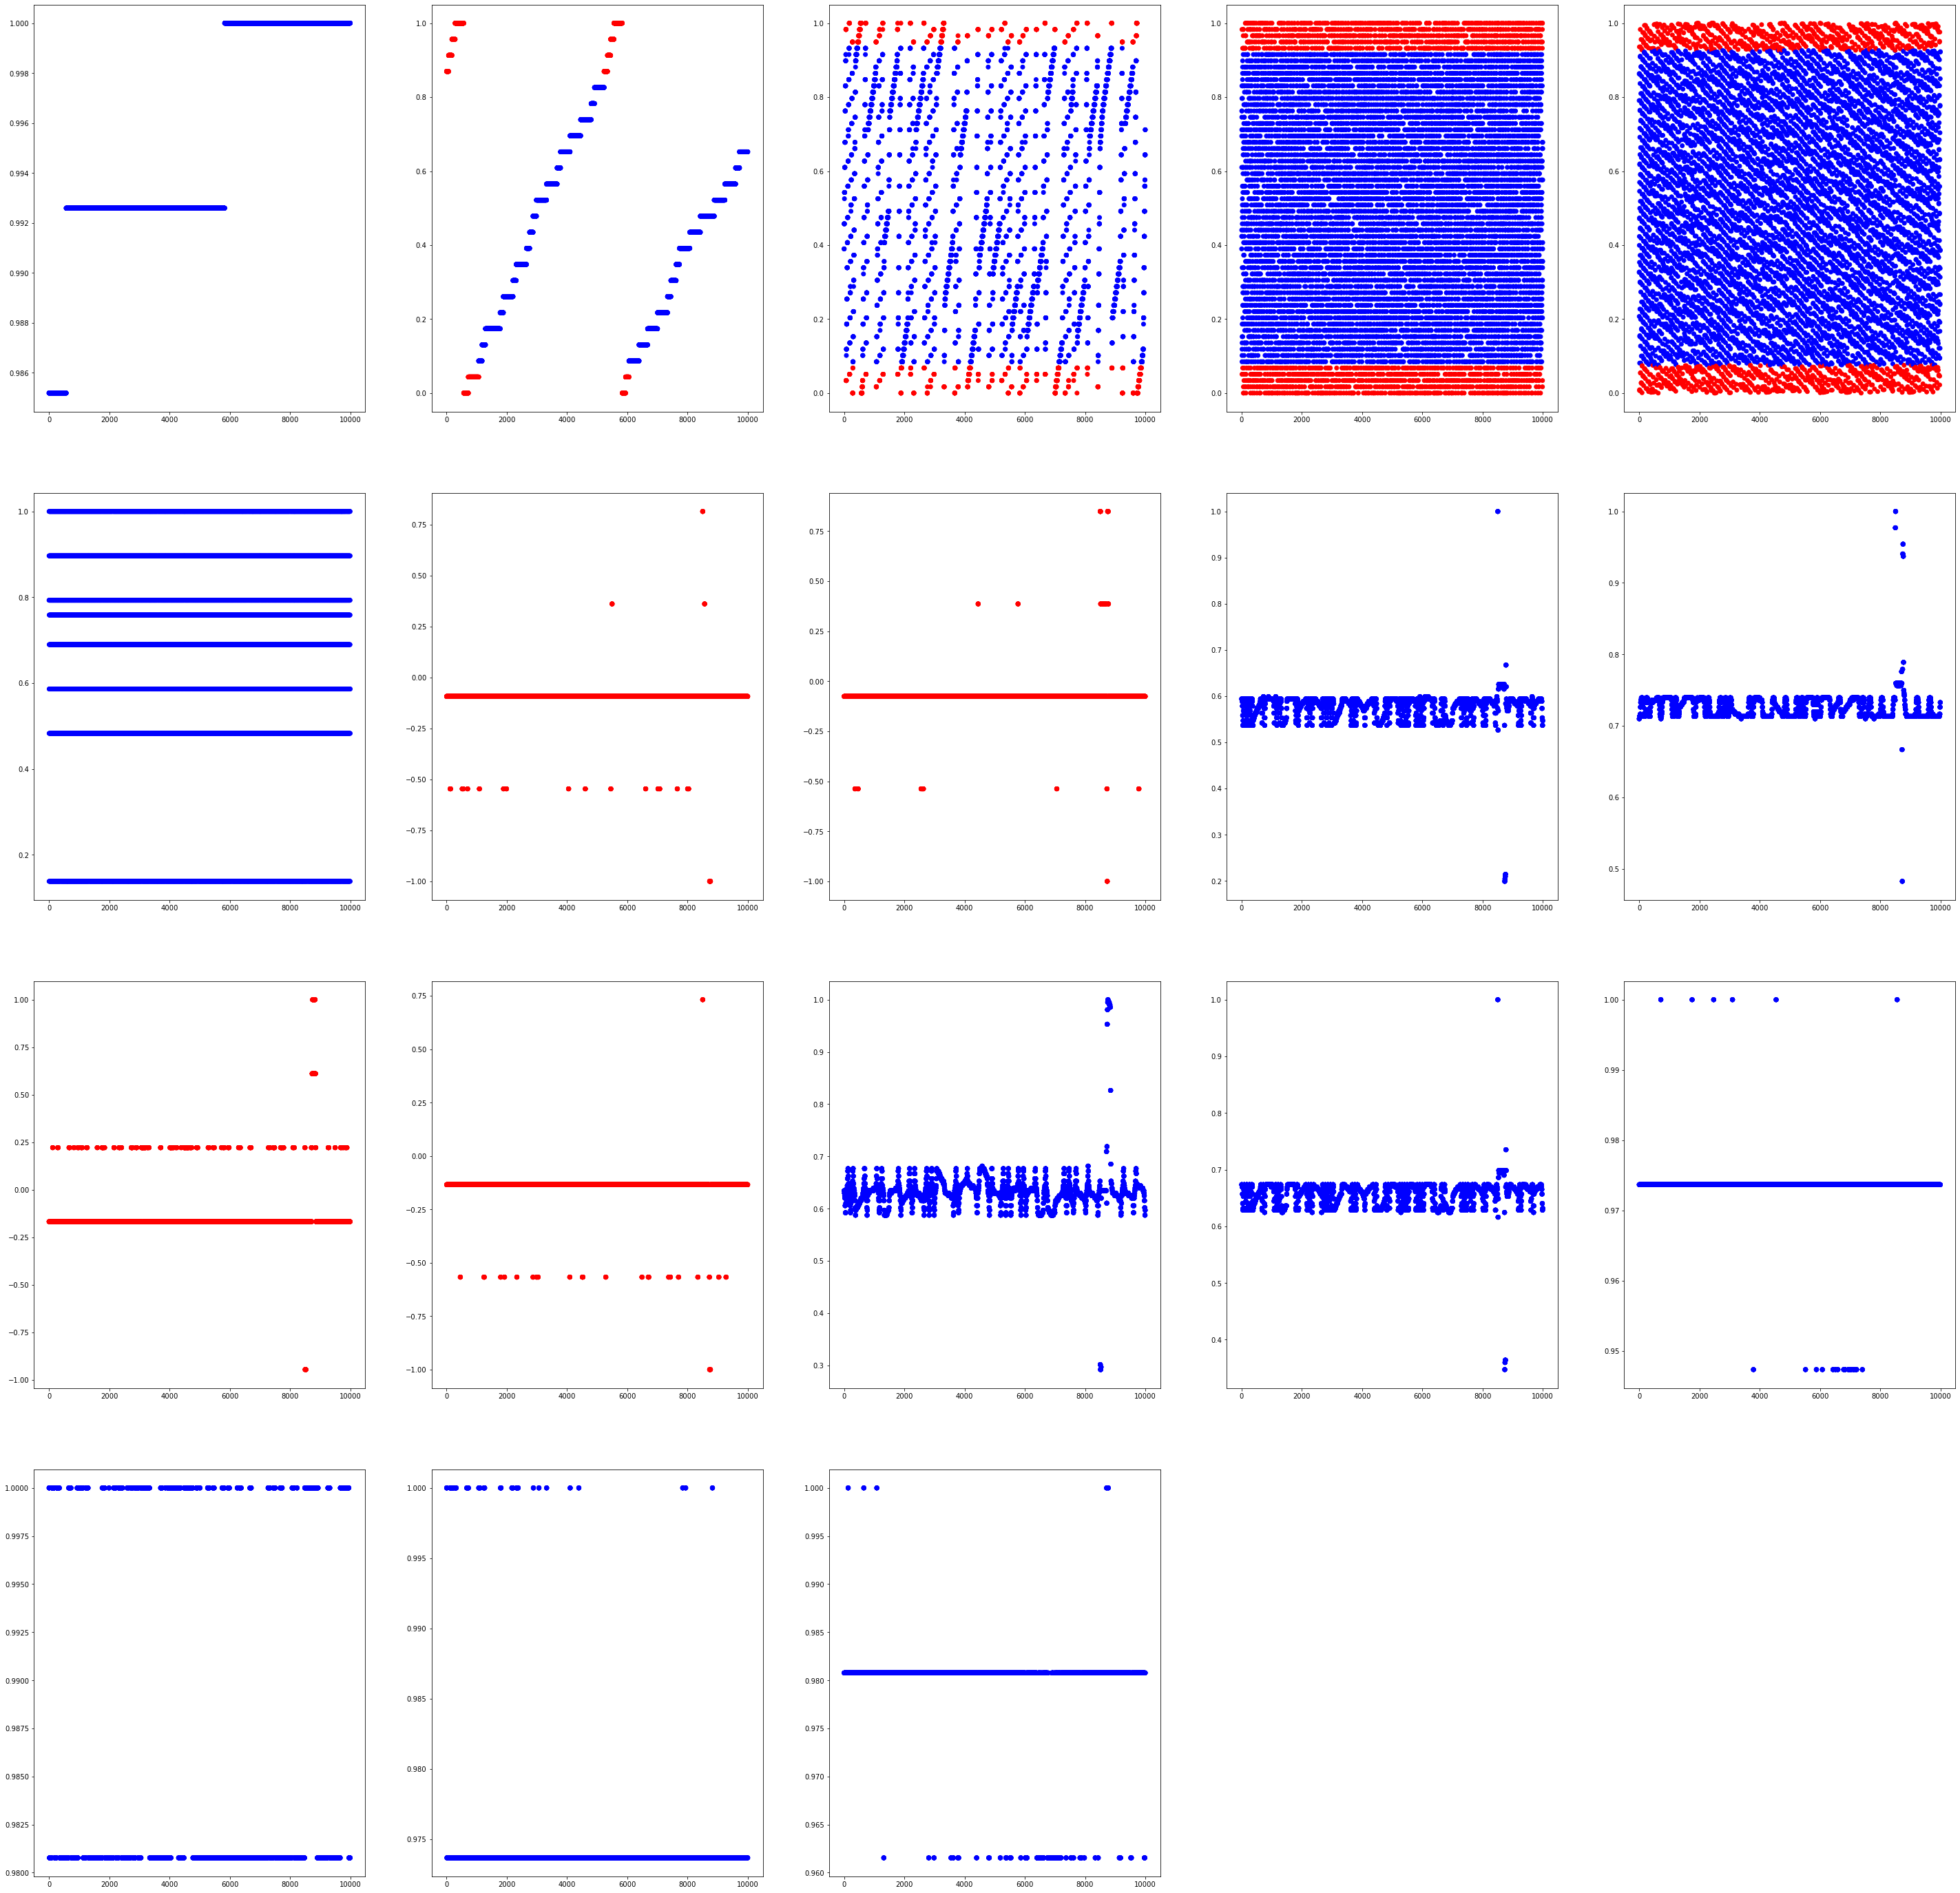

In [41]:
z_scaler = preprocessing.MaxAbsScaler()
newDf = z_scaler.fit_transform(df)

newDf = pd.DataFrame(newDf)

for i in range(18):
  m = np.mean(newDf[i])
  cols = np.where((newDf[i] >= m - (0.85 * m)) & (newDf[i] <= m + (0.85 * m)), 'b', 'r')
  plt.subplot(4,5,i + 1)
  plt.scatter(newDf.index,newDf[i], c = cols)
plt.show()